<a href="https://colab.research.google.com/github/tomonari-masada/course2025-intro2ml/blob/main/09_logistic_regression_%E6%8E%88%E6%A5%AD%E4%B8%AD20250623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰
* 線形回帰を少し変えれば、２値分類に使うこともできるようになる。
* 線形モデルの出力を、シグモイド関数と呼ばれる関数で$[0,1]$の範囲の値へ変換する。
* 目的変数の値が0のときは、0に近い値が出力されるように、また・・・
* 目的変数の値が1のときは、1に近い値が出力されるように、モデルの学習を行う。

## シグモイド関数
$$ \sigma(s) = \frac{1}{1 + e^{- s}} $$
* 正確には、ロジスティック関数と呼ばれる。
* シグモイド関数のひとつとしてロジスティック関数がある、ということ。だが・・・
* シグモイド関数という呼び名の方が広く流通している感じ。
  * https://en.wikipedia.org/wiki/Sigmoid_function

In [ ]:
%config InlineBackend.figure_format = 'retina'

* シグモイド関数の値（縦軸の値）が0から1の範囲に収まっていることを確認してみる。

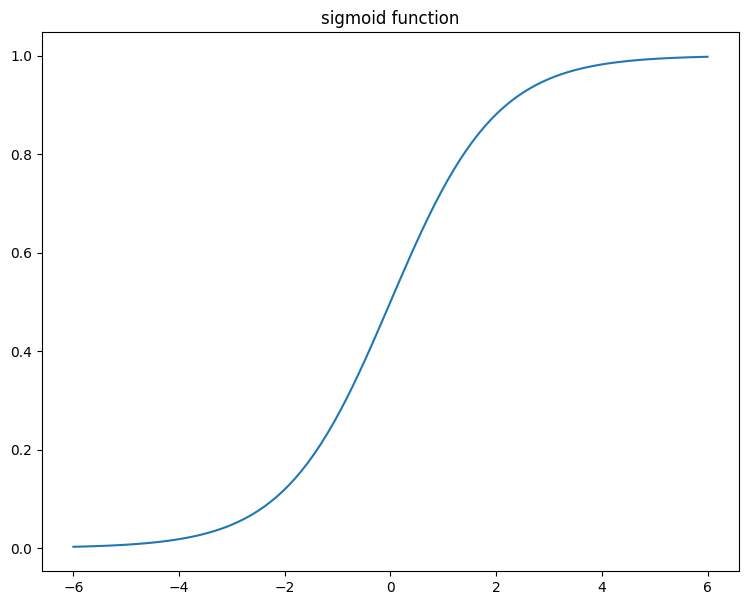

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 101)
y = 1 / (1 + np.exp(- x))
fig = plt.figure(figsize=(9,7))
plt.plot(x, y)
plt.title('sigmoid function')
plt.show()

## toy dataでロジスティック回帰の使い方を把握

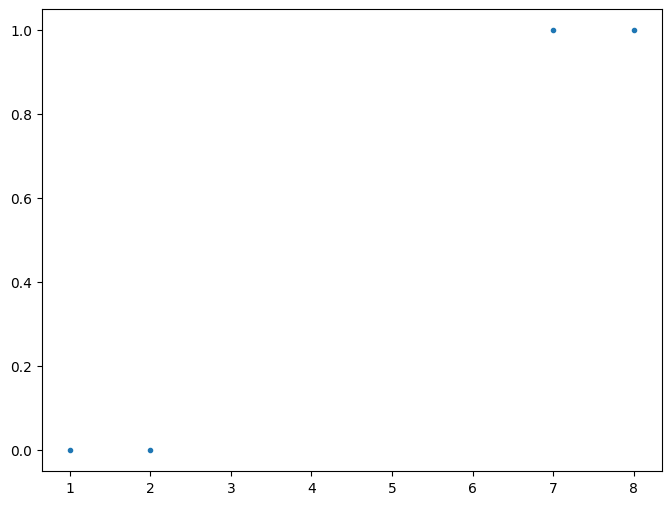

In [2]:
fig = plt.figure(figsize=(8,6))
x = [1, 2, 7, 8]
y = [0, 0, 1, 1]
plt.plot(x, y, '.')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # clfはclassifier（分類器）の略のつもり。

In [4]:
clf.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 7. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [5]:
x = np.array(x).reshape(-1, 1)
print(x)

[[1]
 [2]
 [7]
 [8]]


In [6]:
clf.fit(x, y)

LogisticRegression()

In [8]:
a = clf.coef_[0]
b = clf.intercept_
print(a, b)

[0.85714952] [-3.85738729]


$f(x) = 0.857 x - 3.857$

$g(x) = \frac{1}{1 + e^{- f(x)}} = \frac{1}{1 + e^{- ( 0.857 x - 3.857 )}}$

* どのような関数が、２値分類を実現する関数として推定されたのか、描いてみる。

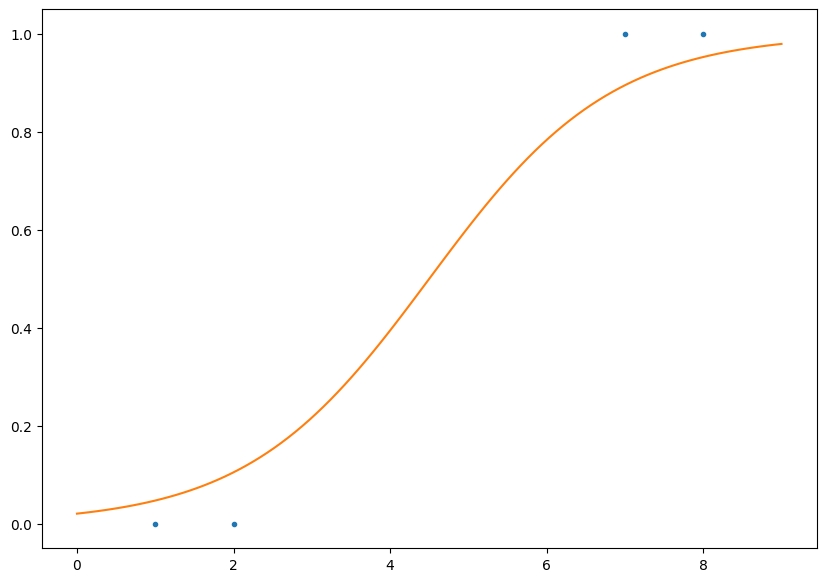

In [9]:
fig = plt.figure(figsize=(10,7))
xs = np.linspace(0,9,101)
ys = clf.predict_proba(xs.reshape(-1,1))
plt.plot(x, y, '.')
plt.plot(xs, ys[:,1])
plt.show()

In [11]:
clf.predict_proba([[7.0], [8.0]])

array([[0.10501917, 0.89498083],
       [0.04743451, 0.95256549]])

# 課題20250623（正則化のある線形回帰モデルの復習）
* scikit-learnの糖尿病データセットを使って、病気の進行度を予測するモデルを作ろう。
* 試すのは、リッジ回帰だけで良い。
* 下にコードを示すので、alphaの値のチューニングを自分で実施し、ベストなalphaの値を探してみよう。
* 参考資料
  * https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

diabates = load_diabetes()
X = diabates.data
y = diabates.target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

alpha = 0.1
reg = Ridge(alpha=alpha)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
rmse_ridge = root_mean_squared_error(y_val, y_pred)
print(f"Ridge alpha={alpha} RMSE: {rmse_ridge:.2f}")

# テストセットでの評価は最後に一回だけ
best_alpha = alpha
reg = Ridge(alpha=best_alpha)
reg.fit(X_train_val, y_train_val)
y_pred_test = reg.predict(X_test)
rmse_ridge_test = root_mean_squared_error(y_test, y_pred_test)
print(f"Ridge alpha={best_alpha} RMSE on test set: {rmse_ridge_test:.2f}")

Ridge alpha=0.1 RMSE: 51.27
Ridge alpha=0.1 RMSE on test set: 53.45


----

# ロジスティック回帰の応用

## 手書き数字画像の分類
* digitsデータセットを使う。
* ただし、digitsデータセットは10値分類なので・・・
* 今回は、「0」かそうでないかの、2値分類問題を、ロジスティック回帰で解く。

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

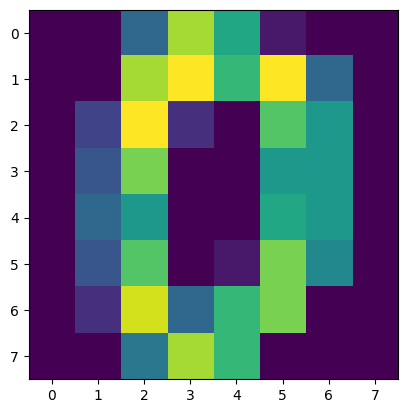

In [26]:
plt.imshow(digits['images'][0])

In [27]:
digits['data'].shape

(1797, 64)

In [19]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### 訓練データ/検証データ/テストデータに分割

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.2,
    random_state=42,
)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,
    random_state=42,
)

In [23]:
print(X_train.shape, X_val.shape, X_test.shape)

(1077, 64) (360, 64) (360, 64)


In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
(y_train == 0).sum()

np.int64(115)

### ２値分類の問題へ変える
* 「0」であるものは正解ラベルを0、そうでないものは全て正解ラベルを1にする。

In [33]:
False * 1

0

In [34]:
y_train = (y_train != 0) * 1

In [36]:
print(list(y_train))

[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)

* クラスラベルは0と1だけになっている。

In [37]:
np.unique(y_train)

array([0, 1])

* 検証データとテストデータも同様にラベルを変更する。

In [38]:
y_val = (y_val != 0) * 1
y_test = (y_test != 0) * 1

### ロジスティック回帰で２値分類

* ロジスティック回帰の予測の式
  * $i$番目のデータについて、以下の式で、0/1の２値ラベルを予測する。
$$ p_i = \frac{1}{1 + e^{ - ( \beta_0 + \beta_1 x_{i,1} + \cdots + \beta_d x_{i, d} ) }} $$

* 真のラベル$t_i$とのズレを表す式
$$ - \{ t_i \log p_i + ( 1 - t_i ) \log (1 - p_i) \} $$
  * この式の値を全てのデータ点にわたって足し合わせたものを最小化する。

* モデルを準備し、訓練データを渡して係数と切片を推定させる。

In [39]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

* `max_iter`を増やしてみる

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

In [41]:
clf.coef_, clf.intercept_

(array([[ 0.00000000e+00,  4.14053560e-02,  3.34892599e-02,
         -1.28616460e-02,  9.28392028e-02,  2.78061901e-01,
          1.23925703e-01,  1.55125849e-02,  3.93894665e-05,
          1.31502665e-01, -2.78217321e-02, -1.10454289e-01,
         -1.56713699e-01, -2.16244259e-01,  2.98361159e-02,
          2.03109282e-02,  4.02593670e-03, -2.05661451e-02,
         -1.26908323e-01, -5.41692342e-02,  4.31379196e-01,
         -2.59178959e-01,  7.80462177e-02,  6.72483323e-03,
          2.00992431e-03, -9.26713152e-02,  3.06730625e-03,
          1.58869759e-01,  5.69305416e-01, -1.36315156e-01,
          3.26135319e-02,  7.14193530e-04,  0.00000000e+00,
         -1.40472432e-01, -1.12066695e-01,  1.00914447e-01,
          5.67789321e-01,  6.29663252e-02, -1.89087407e-02,
          0.00000000e+00,  2.06610889e-03,  4.59040415e-02,
         -2.80294653e-01,  3.16770704e-01,  3.23974914e-01,
          6.15827034e-02, -1.09982484e-03,  3.80351485e-04,
          5.68016030e-03,  1.60045306e-0

In [42]:
print(f'Accuracy: {clf.score(X_val, y_val):.4f}')

Accuracy: 1.0000


* digitsデータを0とそれ以外の2値分類にしてしまうと、問題として簡単になってしまうらしい・・・。

## MNISTデータ

### データの３分割とEDA

* scikit-learnに用意されている仕組みを利用してMNISTデータをダウンロードする。

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
print(X.shape, y.shape)

* 通常、MNISTデータは最後の10000件をテストデータとして使う。

In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

* テストデータ以外の60000件を、訓練データ50000件と検証データ10000件へ分割しておく。

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=10000,
    random_state=42,
)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

* 訓練データから一つの画像を眺めてみる。

In [ ]:
type(X_train)

In [ ]:
plt.imshow(X_train.values[0].reshape(28, -1), cmap=plt.cm.gray);

* 訓練データの最初の100個を可視化してみる。

In [ ]:
fig, axes = plt.subplots(10, 10)
for x, ax in zip(X_train.values, axes.ravel()):
  ax.axis('off') # 軸を消す
  ax.matshow(x.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

* 問題を２値分類問題に変える。
 * 0とそれ以外の2値分類問題にしてしまう。

In [ ]:
y_train = (y_train != '0') * 1
y_val = (y_val != '0') * 1
y_test = (y_test != '0') * 1

In [ ]:
print(f'{(y_train == 0).sum()} zero digits and {(y_train == 1).sum()} non-zero digits in training set')

## ロジスティック回帰による分類の実行
* ロジスティック回帰を準備し、訓練データを渡して係数と切片を推定させる。
  * 訓練データの個数が多いので、少し時間がかかる。
  * 推定計算が収束しない場合は、`max_iter`を増やしてみる（デフォルトの設定は`max_iter=100`）。
  * `solver`（最適化アルゴリズムの設定）を`'saga'`にしているのは、こうしないと時間がかかってしまうため。

## ロジスティック回帰での正則化
* scikit-learnのロジスティック回帰では、`C`というパラメータを調整する。
* `C`は、小さいほど、正則化が強く効く＝係数をより強くゼロに近づける。
  * デフォルトの設定は`C=1.0`。
  * リッジ回帰やLassoの`alpha`とは、向きが逆であることに、注意。
* 正則化の種類は`penalty`を`'l2'`か`'l1'`に設定することでおこなう。
  * `l2`だと、係数の二乗の和を最小化する。
  * `l1`だと、係数の絶対値の和を最小化する。

In [ ]:
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=500)

In [ ]:
clf.fit(X_train[::10], y_train[::10])

* 検証データで評価
  * テストデータは最終評価で一回使うだけです。

In [ ]:
print(f'Accuracy: {clf.score(X_val, y_val):.4f}')

* 推定された係数を可視化してみる。

In [ ]:
plt.imshow(clf.coef_.reshape(28,28), cmap=plt.cm.gray);

## 今回の設定をテストデータ上で評価

In [ ]:
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=500)
clf.fit(X_train_val, y_train_val)
print(f'Accuracy: {clf.score(X_test, y_test):.4f}')

# 課題20250630
* 検証データでの性能がより良い性能になるよう、モデルの設定を調整して訓練データにモデルをfitさせ、検証データで評価する、ということを繰り返し行なってみよう。
* そして、このようにして見つけ出した最良の設定を使って、最後にテストデータで評価しよう。